#Customer Profiling Using RFM and CLV

**Customer profiling** is a critical aspect of marketing and business strategy, focusing on understanding customer behaviors and value to tailor marketing efforts and improve profitability. Two key methods used in customer profiling are **RFM (Recency, Frequency, Monetary) analysis** and **Customer Lifetime Value (CLV) estimation**.

#### **RFM Analysis**

**RFM Analysis** is a technique used to segment customers based on their purchasing behavior:

- **Recency**: How recently a customer has made a purchase. More recent purchases indicate higher engagement.
- **Frequency**: How often a customer makes a purchase. Frequent buyers are generally more loyal.
- **Monetary**: How much money a customer spends. Higher spenders are more valuable.

By analyzing these three dimensions, businesses can categorize customers into segments such as "High-Value Customers," "Lapsed Customers," and "Potential Loyalists," allowing for targeted marketing and personalized engagement strategies.

#### **Customer Lifetime Value (CLV)**

**Customer Lifetime Value (CLV)** is a metric that estimates the total revenue a business can expect from a customer over their entire relationship. CLV is crucial for understanding the long-term value of acquiring and retaining customers. Key components in calculating CLV include:

- **Average Purchase Value**: The average amount spent per transaction.
- **Purchase Frequency**: How often a customer makes a purchase.
- **Customer Lifespan**: The average duration a customer remains active.

Calculating CLV helps businesses make informed decisions about marketing spend, customer retention strategies, and overall business growth.

**Combining RFM and CLV** provides a comprehensive view of customer value, combining behavioral insights from RFM analysis with financial projections from CLV estimation. This approach allows businesses to prioritize their marketing efforts effectively, focusing on high-value segments and optimizing strategies for customer retention and acquisition.


##Structure

In [ ]:
!pip install ydata-profiling scipy

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 77.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=a4ab8e0bd07d1b08aea5b8d0e0fff1fa7930a98f90705105746d9a00c1003691
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:


# Define the path where you want to create the CLV folder
clv_folder_path = '/content/drive/My Drive/CLV'

# Check if the folder already exists, if not, create it
if not os.path.exists(clv_folder_path):
    os.makedirs(clv_folder_path)
    print(f"Folder created at: {clv_folder_path}")
else:
    print(f"Folder already exists at: {clv_folder_path}")


In [47]:
data = pd.read_csv('/content/drive/MyDrive/CLV/customer_segmentation.csv', encoding='ISO-8859-1')

In [62]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


with these infromation we have do multiple analysises

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [64]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [65]:
data.shape

(541909, 8)

In [66]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [67]:
data = data.dropna(subset=['CustomerID'])
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
import pandas as pd
from ydata_profiling import ProfileReport

profile = ProfileReport(data, title="Profiling Report")

##Analysis:

In [112]:
# Convert the type of InvoiceDate field from string to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Create InvoiceYearMonth field

data['InvoiceYearMonth'] = data['InvoiceDate'].map(lambda date: f"{date.year}-{date.month:02d}")


# Calculate Monetary for each row
data['Monetary'] = data['UnitPrice'] * data['Quantity']

# Create a new DataFrame with YearMonth — Monetary columns and sum the Monetary values
monetary = data.groupby(['InvoiceYearMonth'])['Monetary'].sum().reset_index()

# Display the result
print(monetary)

   InvoiceYearMonth     Monetary
0           2010-12   748957.020
1           2011-01   560000.260
2           2011-02   498062.650
3           2011-03   683267.080
4           2011-04   493207.121
5           2011-05   723333.510
6           2011-06   691123.120
7           2011-07   681300.111
8           2011-08   682680.510
9           2011-09  1019687.622
10          2011-10  1070704.670
11          2011-11  1461756.250
12          2011-12   433668.010


In [113]:
#creating a new dataframe with UK customers only
uk = data.query("Country=='United Kingdom'").reset_index(drop=True)
uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Monetary
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34


###Monthly active customers:
we can get the monthly customers by counting unique cutsomer ids

In [107]:
#creating monthly active customers dataframe by counting unique Customer IDs
monthly_active = uk.groupby('InvoiceYearMonth')['CustomerID'].nunique().reset_index()

#print the dataframe
monthly_active

,InvoiceYearMonth,CustomerID
0,2010-12,871
1,2011-01,684
2,2011-02,714
3,2011-03,923
4,2011-04,817
5,2011-05,985
6,2011-06,943
7,2011-07,899
8,2011-08,867
9,2011-09,1177


In April, Monthly Active Customer number dropped to 817 from 923 (-11.5%). We will see the same trend for number of orders as well.

<ipython-input-24-0d170dcfb5f5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y='InvoiceYearMonth', palette='Blues')


<Axes: xlabel='count', ylabel='InvoiceYearMonth'>

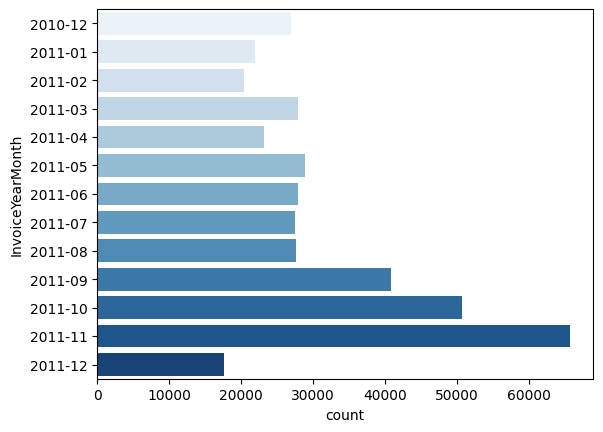

In [24]:
sns.countplot(data=data, y='InvoiceYearMonth', palette='Blues')

 - The chart displays the count of invoices by year and month from 2010 to 2011.
- Key Observations:

1. **Peak Demand**: The highest number of invoices is recorded in November 2011, indicating a peak in demand during this period.
2. **Seasonal Surge**: A significant rise in demand starts from September 2011, coinciding with the beginning of the school year.
3. **Post-Peak Decline**: Demand declines sharply in December 2011, potentially due to the completion of school-related purchases.
4. **Low Demand**: February 2011 shows the lowest demand, possibly reflecting a seasonal downturn after the holiday season.
5. **Stable Months**: Other months show relatively stable demand, with moderate fluctuations observed throughout the year.


###Average Revenue per order:


In [114]:
monthly_order_avg=uk.groupby('InvoiceYearMonth')['Monetary'].mean().reset_index()
monthly_order_avg

,InvoiceYearMonth,Monetary
0,2010-12,16.865860
1,2011-01,13.614680
2,2011-02,16.093027
3,2011-03,16.716166
4,2011-04,15.773380
5,2011-05,17.713823
6,2011-06,16.714748
7,2011-07,15.723497
8,2011-08,17.315899
9,2011-09,18.931723


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, '2010-12'),
  Text(1, 0, '2011-01'),
  Text(2, 0, '2011-02'),
  Text(3, 0, '2011-03'),
  Text(4, 0, '2011-04'),
  Text(5, 0, '2011-05'),
  Text(6, 0, '2011-06'),
  Text(7, 0, '2011-07'),
  Text(8, 0, '2011-08'),
  Text(9, 0, '2011-09'),
  Text(10, 0, '2011-10'),
  Text(11, 0, '2011-11'),
  Text(12, 0, '2011-12')])

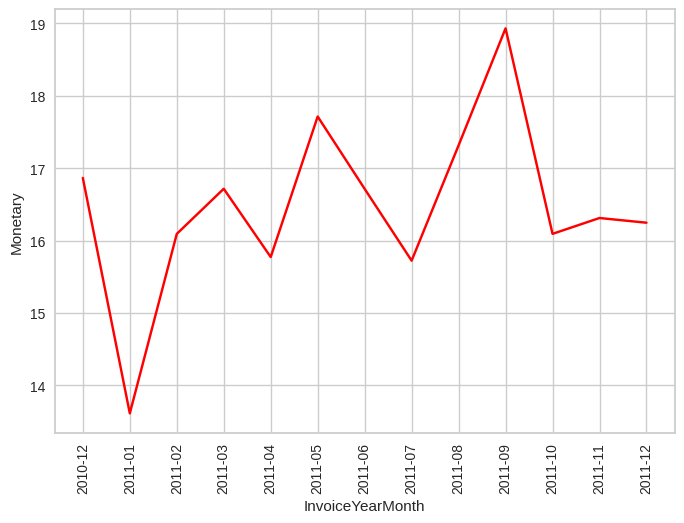

In [115]:
sns.lineplot(data=monthly_order_avg, x='InvoiceYearMonth', y='Monetary', color='red')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, '2010-12'),
  Text(1, 0, '2011-01'),
  Text(2, 0, '2011-02'),
  Text(3, 0, '2011-03'),
  Text(4, 0, '2011-04'),
  Text(5, 0, '2011-05'),
  Text(6, 0, '2011-06'),
  Text(7, 0, '2011-07'),
  Text(8, 0, '2011-08'),
  Text(9, 0, '2011-09'),
  Text(10, 0, '2011-10'),
  Text(11, 0, '2011-11'),
  Text(12, 0, '2011-12')])

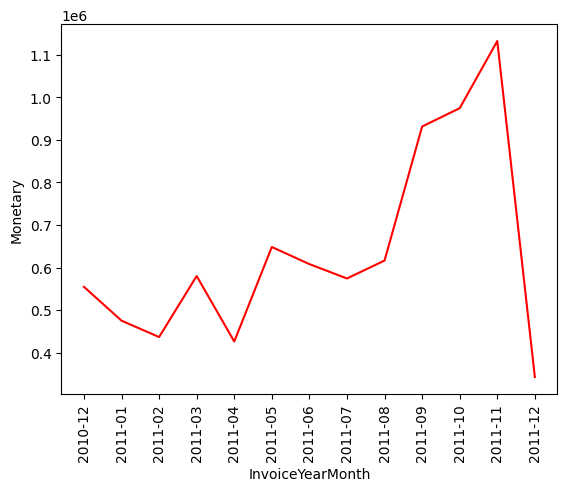

In [28]:
sns.lineplot(data=monetary, x='InvoiceYearMonth', y='Monetary', color='red')
plt.xticks(rotation=90)

 Monetary Value Trend Analysis:
 - This line plot shows the trend of the total monetary value (sum of purchases) across different months from December 2010 to December 2011.
- Key Observations:
   1. **Early Fluctuations**: In the early months (January to April 2011), the monetary value shows some fluctuation, with a slight decline and a dip in March 2011.
   2. **Stable Mid-Year**: From May to August 2011, the monetary value remains relatively stable, showing only minor variations.
   3. **Significant Surge**: Starting in September 2011, there's a sharp increase in the monetary value, peaking in November 2011.
   4. **Sharp Drop**: In December 2011, there’s a steep decline in monetary value, indicating a significant reduction in purchases during that month.
 - Interpretation: The peak in November aligns with the demand surge seen in the previous bar chart, reinforcing the observation that November is the busiest month. The sharp drop in December suggests that the peak was followed by a swift drop-off, likely due to the conclusion of major purchases.


###New Customer Ratio:
First we should define what is a new customer. In our dataset, we can assume a new customer is whoever did his/her first purchase in the time window we defined. We will do it monthly for this example. We will be using .min() function to find our first purchase date for each customer and define new customers based on that. The code below will apply this function and show us the revenue breakdown for each group monthly.

In [118]:
import pandas as pd

# Create a DataFrame containing CustomerID and the first purchase date
min_purchase = uk.groupby('CustomerID').InvoiceDate.min().reset_index()
min_purchase.columns = ['CustomerID', 'MinPurchaseDate']

# Create 'MinPurchaseYearMonth' as an integer
min_purchase['MinPurchaseYearMonth'] = min_purchase['MinPurchaseDate'].apply(lambda date: 100 * date.year + date.month)

# Print min_purchase to verify columns
print("min_purchase DataFrame:")
print(min_purchase.head())

# Merge the first purchase date column into the main DataFrame
uk = pd.merge(uk, min_purchase, on='CustomerID')

# Print uk to verify the columns after merge
print("\nMerged DataFrame (uk):")
print(uk.head())

# Convert 'InvoiceDate' to 'InvoiceYearMonth' in the main DataFrame
uk['InvoiceYearMonth'] = uk['InvoiceDate'].apply(lambda date: 100 * date.year + date.month)

# Check columns of uk to ensure 'MinPurchaseYearMonth' is present
print("\nColumns in merged DataFrame (uk):")
print(uk.columns)

# Create a column called 'UserType' and assign 'Existing' if User's First Purchase Year Month is before the selected Invoice Year Month
uk['UserType'] = 'New'
uk.loc[uk['InvoiceYearMonth'] > uk['MinPurchaseYearMonth'], 'UserType'] = 'Existing'

# Calculate the Revenue per month for each user type
user_type_monetary = uk.groupby(['InvoiceYearMonth', 'UserType'])['Monetary'].sum().reset_index()

print("\nRevenue per month for each user type:")
print(user_type_monetary.head())



min_purchase DataFrame:
   CustomerID     MinPurchaseDate  MinPurchaseYearMonth
0     12346.0 2011-01-18 10:01:00                201101
1     12747.0 2010-12-05 15:38:00                201012
2     12748.0 2010-12-01 12:48:00                201012
3     12749.0 2011-05-10 15:25:00                201105
4     12820.0 2011-01-17 12:34:00                201101

Merged DataFrame (uk):
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1 2010-12-01 08:26:00       3.39     17850.0  United Ki

In [119]:
uk

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Monetary,MinPurchaseDate_x,MinPurchaseYearMonth_x,UserType,MinPurchaseDate_y,MinPurchaseYearMonth_y,MinPurchaseDate,MinPurchaseYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30,2010-12-01 08:26:00,201012,New,2010-12-01 08:26:00,201012,2010-12-01 08:26:00,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,New,2010-12-01 08:26:00,201012,2010-12-01 08:26:00,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00,2010-12-01 08:26:00,201012,New,2010-12-01 08:26:00,201012,2010-12-01 08:26:00,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,New,2010-12-01 08:26:00,201012,2010-12-01 08:26:00,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,New,2010-12-01 08:26:00,201012,2010-12-01 08:26:00,201012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361873,581416,22809,SET OF 6 T-LIGHTS SANTA,1,2011-12-08 14:58:00,2.95,14569.0,United Kingdom,201112,2.95,2011-12-08 14:58:00,201112,New,2011-12-08 14:58:00,201112,2011-12-08 14:58:00,201112
361874,581416,22807,SET OF 6 T-LIGHTS TOADSTOOLS,2,2011-12-08 14:58:00,1.25,14569.0,United Kingdom,201112,2.50,2011-12-08 14:58:00,201112,New,2011-12-08 14:58:00,201112,2011-12-08 14:58:00,201112
361875,581416,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-12-08 14:58:00,2.10,14569.0,United Kingdom,201112,2.10,2011-12-08 14:58:00,201112,New,2011-12-08 14:58:00,201112,2011-12-08 14:58:00,201112
361876,581416,22809,SET OF 6 T-LIGHTS SANTA,2,2011-12-08 14:58:00,2.95,14569.0,United Kingdom,201112,5.90,2011-12-08 14:58:00,201112,New,2011-12-08 14:58:00,201112,2011-12-08 14:58:00,201112


In [120]:
user_type_monetary.query('InvoiceYearMonth ! = 201012 and InvoiceYearMonth ! = 201112')

,InvoiceYearMonth,UserType,Monetary
1,201101,Existing,195275.510
2,201101,New,156705.770
3,201102,Existing,220994.630
4,201102,New,127859.000
5,201103,Existing,296350.030
6,201103,New,160567.840
7,201104,Existing,268226.660
8,201104,New,108517.751
9,201105,Existing,434725.860
10,201105,New,90847.490


Existing customers are showing a positive trend and tell us that our customer base is growing but new customers have a slight negative trend.


In [121]:
#create a dataframe that shows new user ratio; drop NA values (first month new user ratio is 0)
user_ratio = uk.query("UserType == 'New'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique() / uk.query("UserType == 'Existing'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique()
user_ratio = user_ratio.reset_index()
user_ratio = user_ratio.dropna()
user_ratio

,InvoiceYearMonth,CustomerID
1,201101,1.124224
2,201102,0.904000
3,201103,0.792233
4,201104,0.510166
5,201105,0.343793
6,201106,0.281250
7,201107,0.236589
8,201108,0.192572
9,201109,0.304878
10,201110,0.328852


(array([201100., 201102., 201104., 201106., 201108., 201110., 201112.,
        201114.]),
 [Text(201100.0, 0, '0'),
  Text(201102.0, 0, '2'),
  Text(201104.0, 0, '4'),
  Text(201106.0, 0, '6'),
  Text(201108.0, 0, '8'),
  Text(201110.0, 0, '10'),
  Text(201112.0, 0, '12'),
  Text(201114.0, 0, '14')])

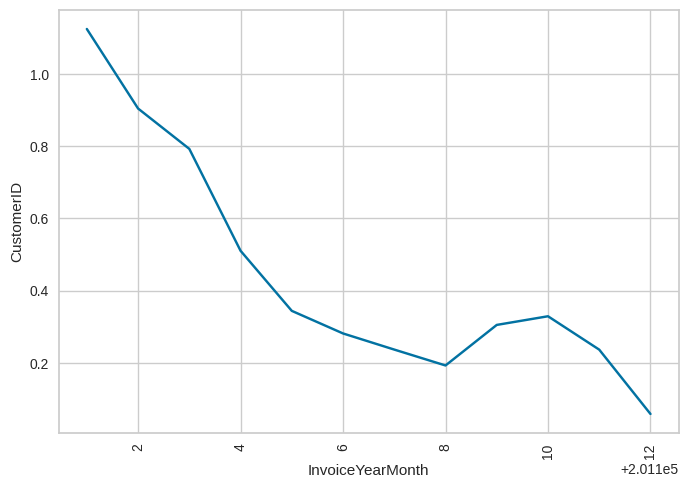

In [122]:
sns.lineplot(data=user_ratio, x='InvoiceYearMonth', y='CustomerID')
plt.xticks(rotation=90)

we can see that acquiring new customers is a bit hard for the company
New Customer Ratio has declined as expected (we assumed on Feb, all customers were New) and running around 20%.

### Monthly Retention Rate
Retention rate should be monitored very closely because it indicates how sticky is your service and how well your product fits the market.

For making Monthly Retention Rate visualized, we need to calculate how many customers retained from previous month.

Monthly Retention Rate = Retained Customers From Prev. Month/Active Customers Total

We will be using crosstab() function of pandas which makes calculating Retention Rate super easy.

In [136]:
#identify which users are active by looking at their revenue per month
user_purchase = uk.groupby(['CustomerID','InvoiceYearMonth'])['Monetary'].sum().reset_index()

#create retention matrix with crosstab
retention = pd.crosstab(user_purchase['CustomerID'], user_purchase['InvoiceYearMonth']).reset_index()
retention.head()

#create an array of dictionary which keeps Retained & Total User count for each month
months = retention.columns[2:]
retention_array = []

for i in range(len(months)-1):
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    retention_data['InvoiceYearMonth'] = int(selected_month)
    retention_data['TotalUserCount'] = retention[selected_month].sum()
    retention_data['RetainedUserCount'] = retention[(retention[selected_month] > 0) & (retention[prev_month] > 0)][selected_month].sum()
    retention_array.append(retention_data)

#convert the array to dataframe and calculate Retention Rate
retention = pd.DataFrame(retention_array)
retention['RetentionRate'] = retention['RetainedUserCount'] / retention['TotalUserCount']

In [137]:
# dataframe that shows total monthly revenue for each customer
user_purchase = uk.groupby(['CustomerID', 'InvoiceYearMonth'])['Monetary'].sum().astype(int).reset_index()
user_purchase.head()

,CustomerID,InvoiceYearMonth,Monetary
0,12346.0,201101,0
1,12747.0,201012,706
2,12747.0,201101,303
3,12747.0,201103,310
4,12747.0,201105,771


In [138]:
#crosstab() to covert to retention table
retention_table = pd.crosstab(user_purchase['CustomerID'], user_purchase['InvoiceYearMonth']).reset_index()
retention.head()

,InvoiceYearMonth,TotalUserCount,RetainedUserCount,RetentionRate
0,201102,714,263,0.368347
1,201103,923,305,0.330444
2,201104,817,310,0.379437
3,201105,985,369,0.374619
4,201106,943,417,0.442206


Retention table shows us which customers are active on each month (1 stands for active).
With the help of a simple for loop, for each month we calculate Retained Customer Count from previous month and Total Customer Count.

In the end, we have our Retention Rate dataframe

In [140]:
retention['RetentionRate'] = retention['RetainedUserCount'] / retention['TotalUserCount']
retention

,InvoiceYearMonth,TotalUserCount,RetainedUserCount,RetentionRate
0,201102,714,263,0.368347
1,201103,923,305,0.330444
2,201104,817,310,0.379437
3,201105,985,369,0.374619
4,201106,943,417,0.442206
5,201107,899,379,0.421580
6,201108,867,391,0.450980
7,201109,1177,417,0.354291
8,201110,1285,502,0.390661
9,201111,1548,616,0.397933


(array([201100., 201102., 201104., 201106., 201108., 201110., 201112.,
        201114.]),
 [Text(201100.0, 0, '0'),
  Text(201102.0, 0, '2'),
  Text(201104.0, 0, '4'),
  Text(201106.0, 0, '6'),
  Text(201108.0, 0, '8'),
  Text(201110.0, 0, '10'),
  Text(201112.0, 0, '12'),
  Text(201114.0, 0, '14')])

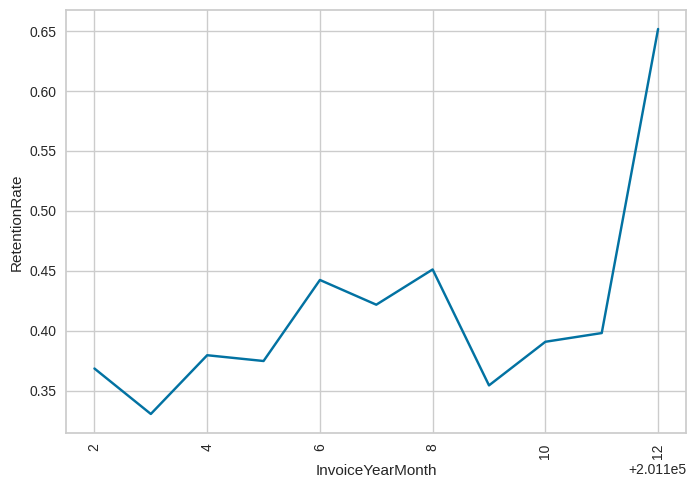

In [141]:
sns.lineplot(data=retention, x='InvoiceYearMonth', y='RetentionRate')
plt.xticks(rotation=90)

Monthly Retention Rate significantly jumped from June to August and went back to previous levels afterwards.
### Customer Segmentation
RFM stands for Recency - Frequency - Monetary Value. Theoretically we will have segments like below:
 - Low Value: Customers who are less active than others, not very frequent buyer/visitor and generates very low - zero - maybe negative revenue.
 - Mid Value: In the middle of everything. Often using our platform (but not as much as our  High Values), fairly frequent and generates moderate revenue.
 - High Value: The group we don’t want to lose. High Revenue, Frequency and low Inactivity.

As the methodology, we need to calculate Recency, Frequency and Monetary Value and apply unsupervised machine learning to identify different groups (clusters) for each.

##RFM

###Recency

In [7]:
# Create a user dataframe to hold CustomerID and new segmentation scores
user = pd.DataFrame(uk['CustomerID'].unique())
user.columns = ['CustomerID']

# Get the max purchase date for each customer and create a dataframe with it
max_purchase = uk.groupby('CustomerID').InvoiceDate.max().reset_index()
max_purchase.columns = ['CustomerID', 'MaxPurchaseDate']

# We take the observation point as the max invoice date in the dataset
max_purchase['Recency'] = (max_purchase['MaxPurchaseDate'].max() - max_purchase['MaxPurchaseDate']).dt.days

# Merge this dataframe to the new user dataframe
user = pd.merge(user, max_purchase[['CustomerID', 'Recency']], on='CustomerID')

# Display the first few rows of the resulting dataframe
user.head()


,CustomerID,Recency
0,17850.0,301
1,13047.0,31
2,13748.0,95
3,15100.0,329
4,15291.0,25


<Axes: xlabel='Recency', ylabel='Count'>

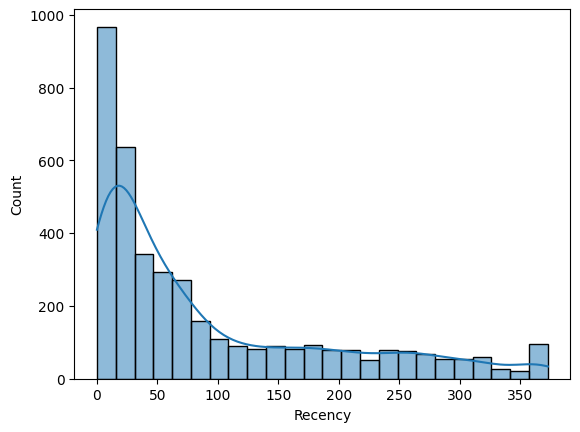

In [127]:
sns.histplot(data=user, x='Recency', kde=True)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


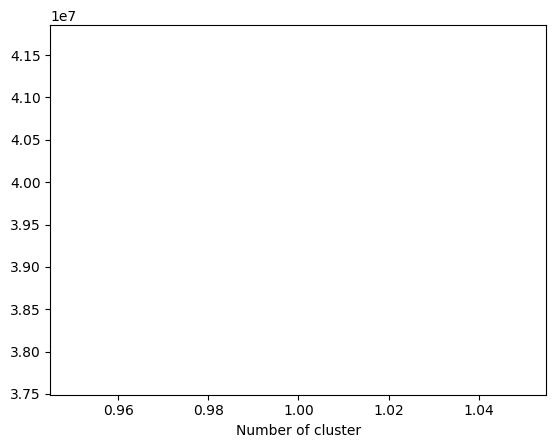

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


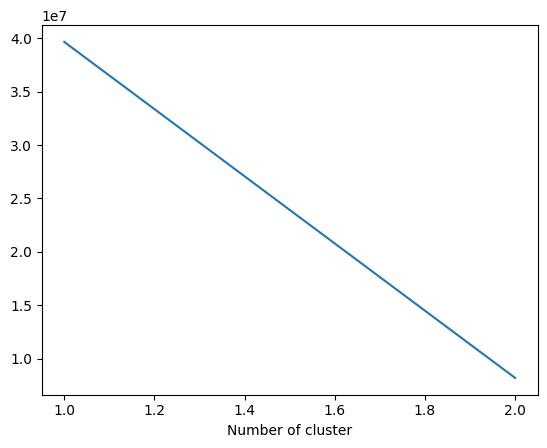

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


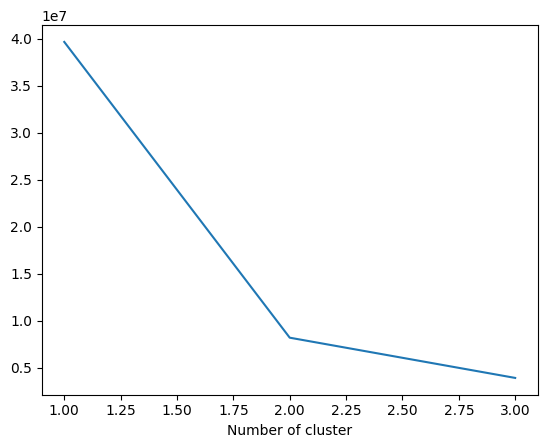

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


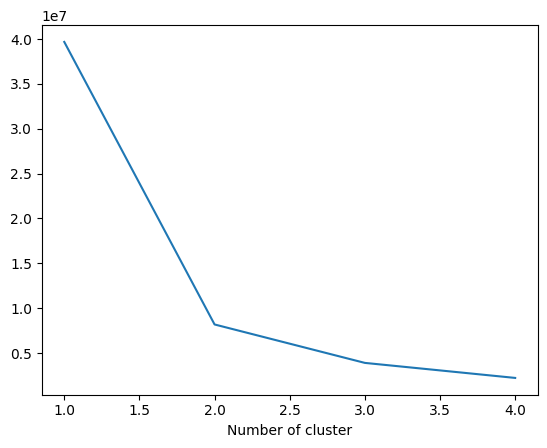

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


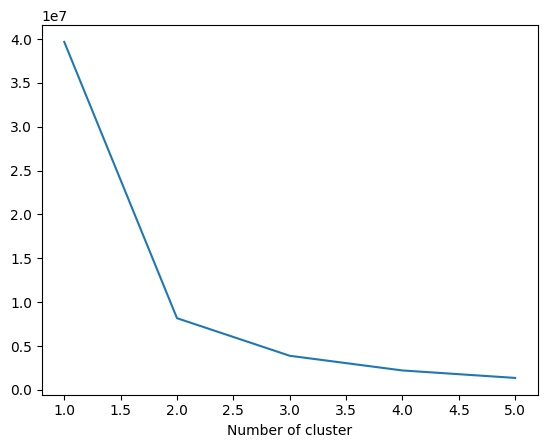

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


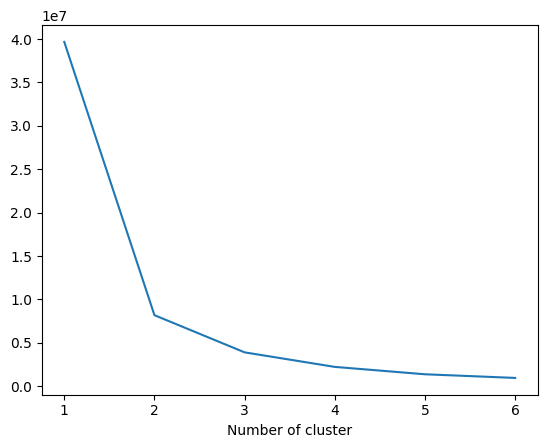

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


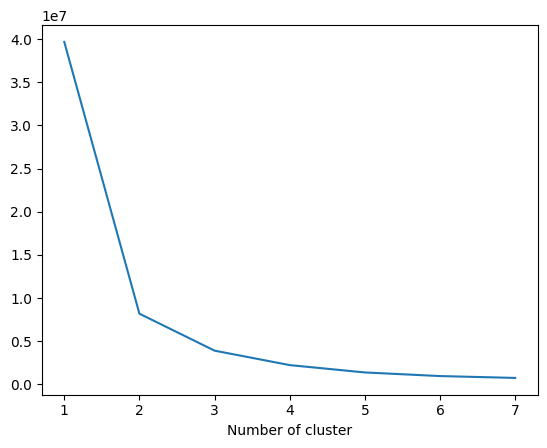

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


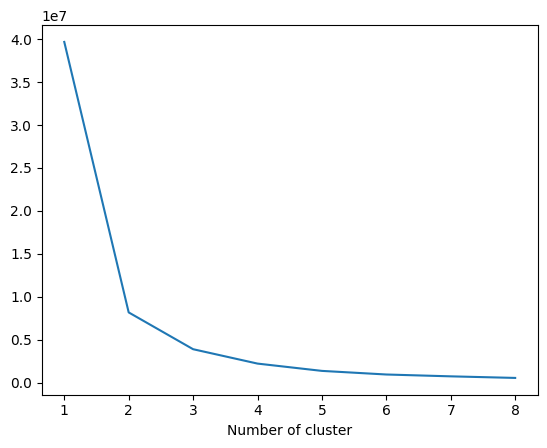

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


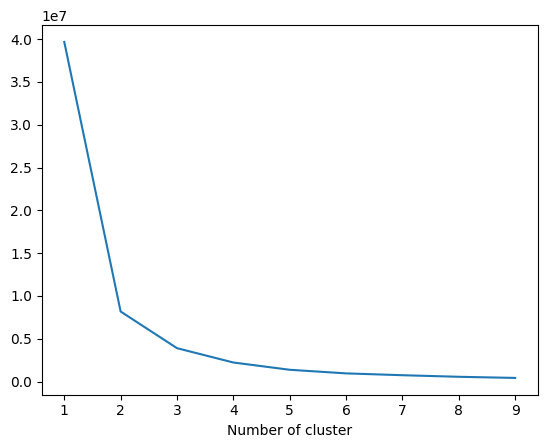

In [179]:
from sklearn.cluster import KMeans
sse={}
recency=user[['Recency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(recency)
    recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.xlabel("Number of cluster")
    plt.show()

here it looks like 3 is an optimal number, but we should go according to buisness requirements , for this example we will go with 4

In [8]:
from sklearn.cluster import KMeans

# Fit KMeans with Recency data
kmeans = KMeans(n_clusters=4, random_state=42)
user['RecencyCluster'] = kmeans.fit_predict(user[['Recency']])

# Function for ordering clustering numbers
def order_cluster(cluster_field_name, target_field_name, df, ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    data_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    data_new = data_new.sort_values(by=target_field_name, ascending=ascending).reset_index(drop=True)
    data_new['index'] = data_new.index
    data_final = pd.merge(df, data_new[[cluster_field_name, 'index']], on=cluster_field_name)
    data_final = data_final.drop([cluster_field_name], axis=1)
    data_final = data_final.rename(columns={"index": cluster_field_name})
    return data_final

# Reorder clusters so that the cluster with the lowest recency gets the highest number
user = order_cluster('RecencyCluster', 'Recency', user, False)

# Display the first few rows of the user DataFrame
user.head()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,CustomerID,Recency,RecencyCluster
0,17850.0,301,0
1,15100.0,329,0
2,18074.0,373,0
3,16250.0,260,0
4,13747.0,373,0


In [9]:
kmeans=KMeans(n_clusters=4, random_state=42)
kmeans.fit(user[['Recency']])
user['RecencyCluster'] = kmeans.predict(user[['Recency']])
user = order_cluster('RecencyCluster', 'Recency', user, False)
user.groupby('RecencyCluster')['Recency'].describe()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,478.0,304.393305,41.183489,245.0,266.25,300.0,336.00,373.0
1,568.0,184.625000,31.753602,132.0,156.75,184.0,211.25,244.0
2,954.0,77.679245,22.850898,48.0,59.00,72.5,93.00,131.0
3,1950.0,17.488205,13.237058,0.0,6.00,16.0,28.00,47.0


###frequency


In [10]:
#get order counts for each user and create a data frame with it
frquency=uk.groupby('CustomerID').InvoiceDate.count().reset_index()
frquency.columns=['CustomerID','Frequency']
##adding this to our main dataframe
user=pd.merge(user,frquency,on='CustomerID')
user.head()

,CustomerID,Recency,RecencyCluster,Frequency
0,17850.0,301,0,312
1,15100.0,329,0,6
2,18074.0,373,0,13
3,16250.0,260,0,24
4,13747.0,373,0,1


In [11]:
#k_means
kmeans=KMeans(n_clusters=4, random_state=42)
kmeans.fit(user[['Frequency']])
user['FrequencyCluster'] = kmeans.predict(user[['Frequency']])
user = order_cluster('FrequencyCluster', 'Frequency', user, True)
user.groupby('FrequencyCluster')['Frequency'].describe()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,3496.0,49.525744,44.954212,1.0,15.0,33.0,73.0,190.0
1,429.0,331.221445,133.856510,191.0,228.0,287.0,399.0,803.0
2,22.0,1313.136364,505.934524,872.0,988.5,1140.0,1452.0,2782.0
3,3.0,5917.666667,1805.062418,4642.0,4885.0,5128.0,6555.5,7983.0


high frequency customers indicates better customers


###Monetary

In [12]:
#calculate revenue for each customer
uk['Monetary'] = uk['UnitPrice'] * uk['Quantity']
monetary = uk.groupby('CustomerID').Monetary.sum().reset_index()

#merge it with our main dataframe
user = pd.merge(user, monetary, on='CustomerID')
user.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary
0,17850.0,301,0,312,1,5288.63
1,15808.0,305,0,210,1,3724.77
2,13047.0,31,3,196,1,3079.10
3,14688.0,7,3,359,1,5107.38
4,16029.0,38,3,274,1,50992.61


In [13]:
#applying clustering
kmeans=KMeans(n_clusters=4, random_state=42)
kmeans.fit(user[['Monetary']])
user['MonetaryCluster'] = kmeans.predict(user[['Monetary']])
#order the cluster numbers
user = order_cluster('MonetaryCluster', 'Monetary', user, True)
user.groupby('MonetaryCluster')['Monetary'].describe()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,count,mean,std,min,25%,50%,75%,max
MonetaryCluster,,,,,,,,
0,3687.0,907.254414,921.910820,-4287.63,263.115,572.56,1258.220,4314.72
1,234.0,7760.699530,3637.173671,4330.67,5161.485,6549.38,9142.305,21535.90
2,27.0,43070.445185,15939.249588,25748.35,28865.490,36351.42,53489.790,88125.38
3,2.0,221960.330000,48759.481478,187482.17,204721.250,221960.33,239199.410,256438.49


In [169]:
user.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,MonetaryCluster
0,17850.0,301,0,312,1,5288.63,0
1,16919.0,155,1,327,1,2596.45,0
2,17337.0,150,1,548,1,1944.32,0
3,13869.0,122,1,307,1,3104.95,0
4,14472.0,103,1,281,1,1936.84,0


###Overall Score:


In [14]:
#calculate overall score and use mean() to see details
user['OverallScore'] = user['RecencyCluster'] + user['FrequencyCluster'] + user['MonetaryCluster']
user.groupby('OverallScore')[['Recency', 'Frequency', 'Monetary']].mean()

,Recency,Frequency,Monetary
OverallScore,,,
0,304.584388,21.995781,303.339705
1,185.362989,32.596085,498.087546
2,78.991304,46.963043,868.082991
3,20.689610,68.419590,1091.416414
4,14.892617,271.755034,3607.097114
5,9.662162,373.290541,9136.946014
6,7.740741,876.037037,22777.914815
7,1.857143,1272.714286,103954.025714
8,1.333333,5917.666667,42177.930000


Let's name these scores:
- 0 to 1: Low Value
- 2 to 3: Mid Value
- 4+: High Value

In [15]:
user['OverallScore'].value_counts()

,count
OverallScore,
3,1511
2,920
1,562
0,474
4,298
5,148
6,27
7,7
8,3


In [16]:
def assign_segment(overall_score):
    if overall_score in [0, 1, 2]:
        return 'Low-Value Customers'
    elif overall_score in [3, 4]:
        return 'Mid-Value Customers'
    elif overall_score in [5, 6]:
        return 'High-Value Customers'
    elif overall_score in [7, 8]:
        return 'Top-Value Customers'
    else:
        return 'Unknown'

# Apply the function to create the new 'segment' column
user['segment'] = user['OverallScore'].apply(assign_segment)

In [17]:
value_counts = user['segment'].value_counts()
print(value_counts)

segment
Low-Value Customers     1956
Mid-Value Customers     1809
High-Value Customers     175
Top-Value Customers       10
Name: count, dtype: int64


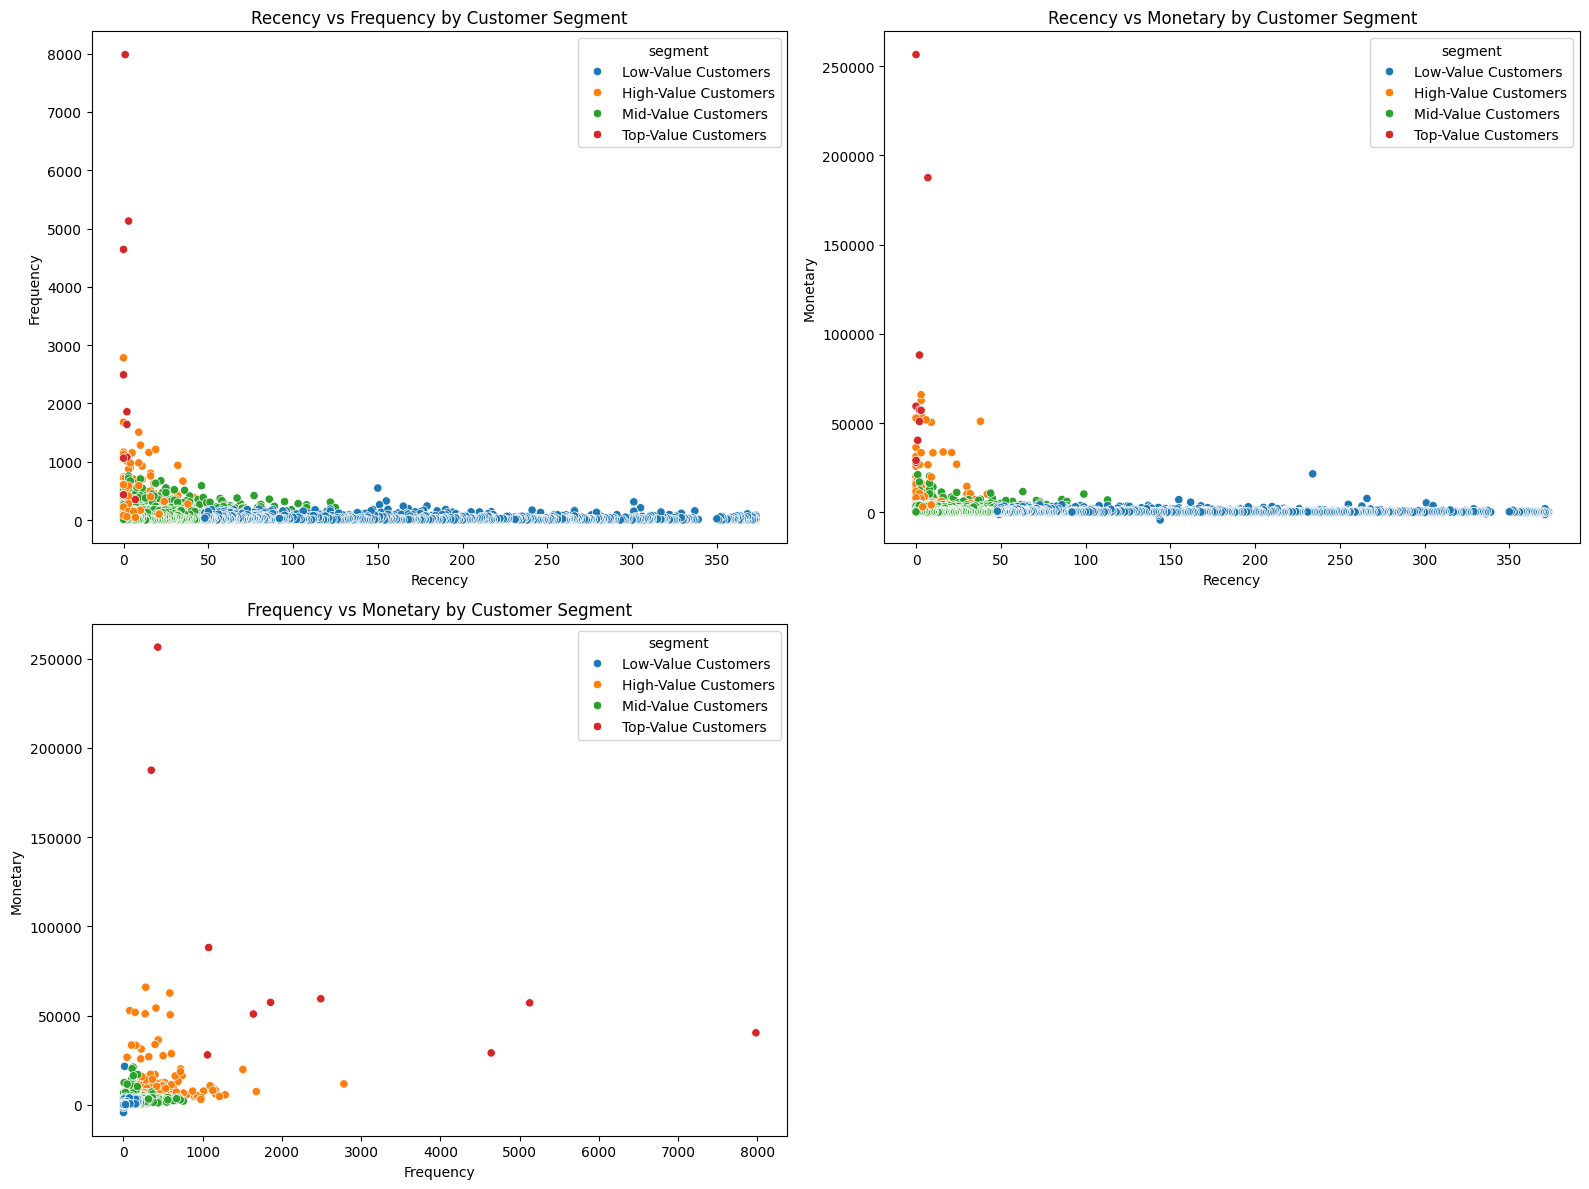

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure with 3 subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Scatter plot of Recency vs Frequency
sns.scatterplot(x='Recency', y='Frequency', hue='segment', data=user, ax=axes[0, 0])
axes[0, 0].set_title('Recency vs Frequency by Customer Segment')
axes[0, 0].set_xlabel('Recency')
axes[0, 0].set_ylabel('Frequency')

# Scatter plot of Recency vs Monetary
sns.scatterplot(x='Recency', y='Monetary', hue='segment', data=user, ax=axes[0, 1])
axes[0, 1].set_title('Recency vs Monetary by Customer Segment')
axes[0, 1].set_xlabel('Recency')
axes[0, 1].set_ylabel('Monetary')

# Scatter plot of Frequency vs Monetary
sns.scatterplot(x='Frequency', y='Monetary', hue='segment', data=user, ax=axes[1, 0])
axes[1, 0].set_title('Frequency vs Monetary by Customer Segment')
axes[1, 0].set_xlabel('Frequency')
axes[1, 0].set_ylabel('Monetary')

# Hide the last empty subplot
axes[1, 1].axis('off')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()


<ipython-input-202-2ff1072e8234>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='Spectral')


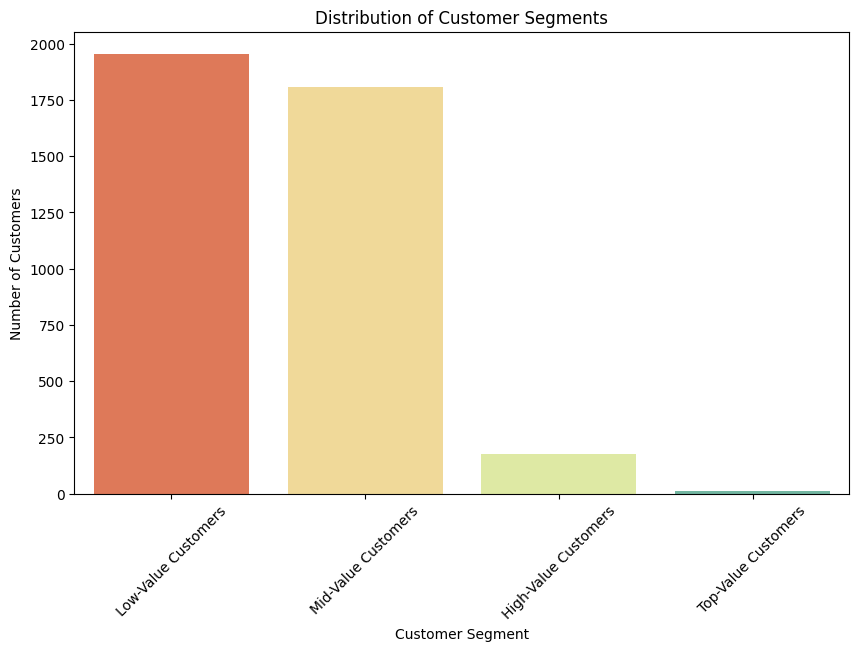

In [202]:
# Count the number of customers in each segment
segment_counts = user['segment'].value_counts()

# Bar plot of segment distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='Spectral')
plt.title('Distribution of Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

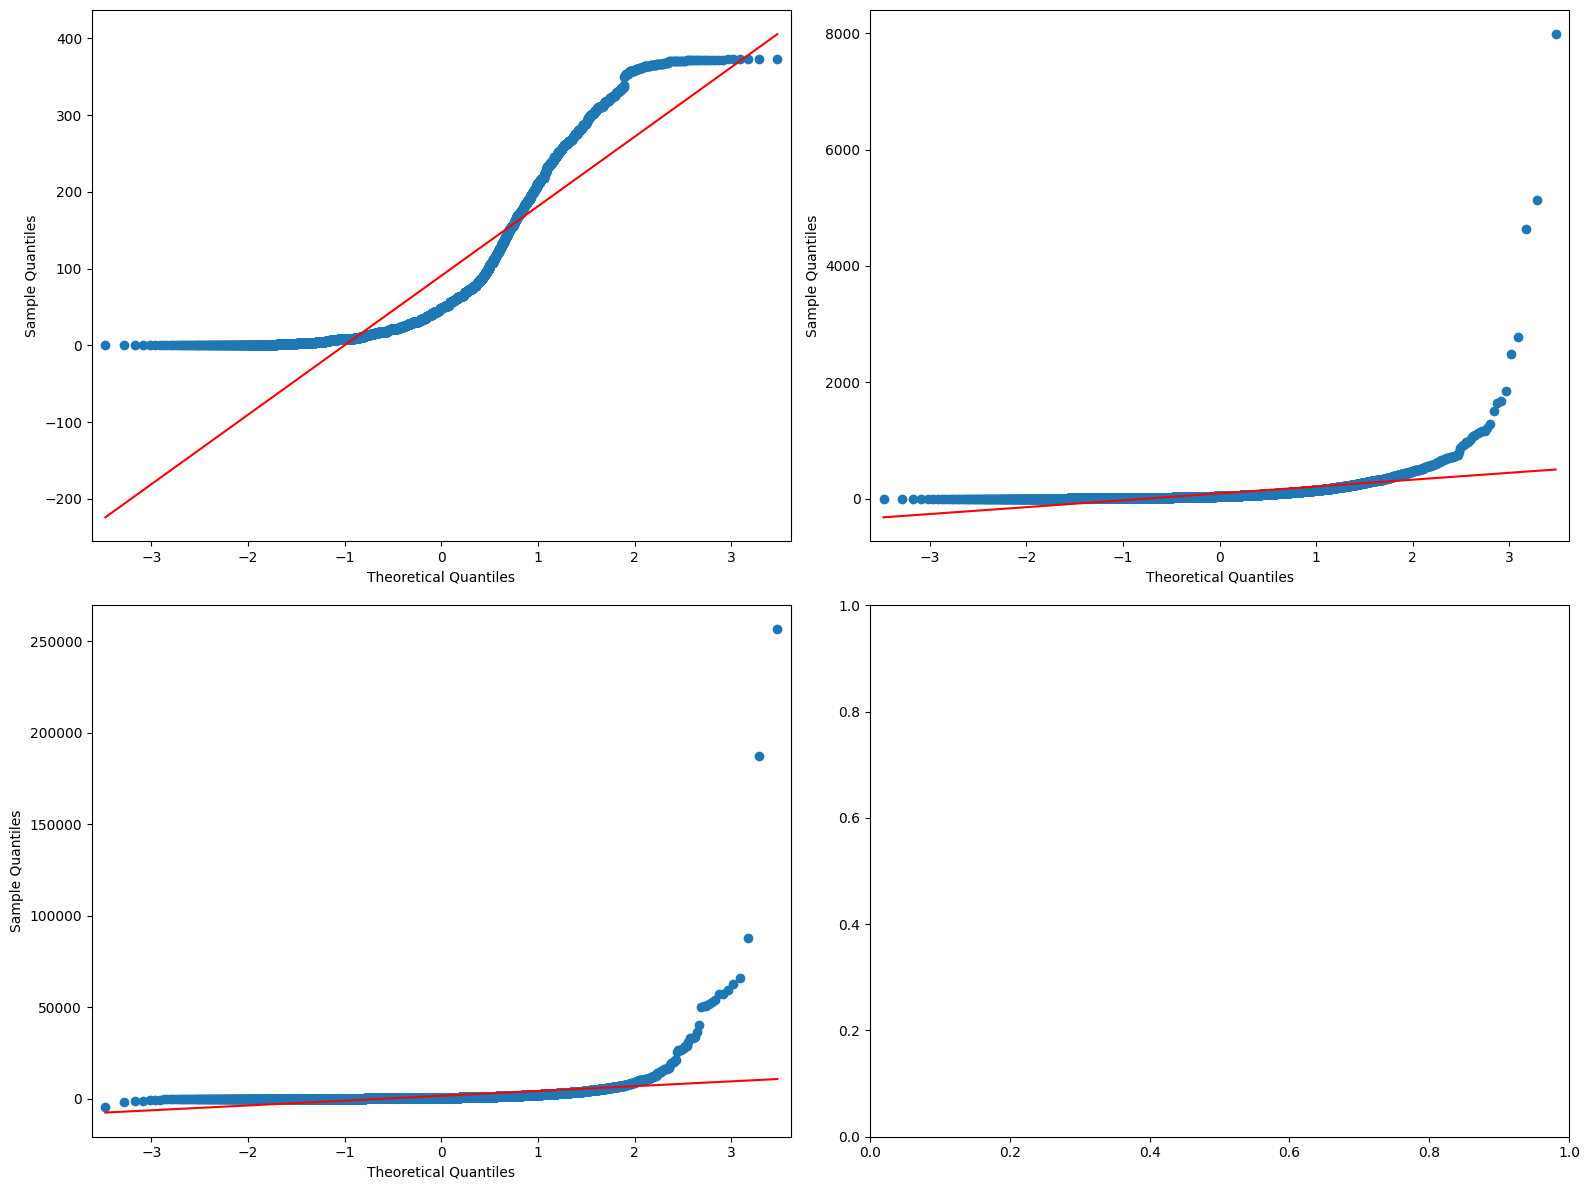

In [19]:
from statsmodels.graphics.gofplots import qqplot

#set up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# plot a simple histogram
qqplot(user['Recency'], line='r', ax=axes[0,0],label='Recency')
qqplot(user['Frequency'], line='r', ax=axes[0,1],label='Frequency')
qqplot(user['Monetary'], line='r', ax=axes[1,0],label='Monetary')
plt.tight_layout()
plt.show()

In [21]:
print('skewness (Recency): %f'% user.Recency.skew())
print('*'*60)
print('kurtosis (Recency): %f'% user.Recency.kurt())
print('*'*60)
print('skewness (Frequency): %f'% user.Frequency.skew())
print('*'*60)
print('kurtosis (Frequency): %f'% user.Frequency.kurt())
print('*'*60  )
print('skewness (Monetary): %f'% user.Monetary.skew())
print('*'*60)
print('kurtosis (Monetary): %f'% user.Monetary.kurt())
print('*'*60)

skewness (Recency): 1.249520
************************************************************
kurtosis (Recency): 0.444591
************************************************************
skewness (Frequency): 18.649754
************************************************************
kurtosis (Frequency): 541.728117
************************************************************
skewness (Monetary): 23.346235
************************************************************
kurtosis (Monetary): 765.039442
************************************************************


### 1. **Skewness**
   - **Definition**: Skewness measures the asymmetry of the distribution of values in a dataset. It indicates whether the data is skewed to the left (negative skewness) or right (positive skewness).
   - **Interpretation**:
     - **Skewness near 0**: Indicates that the data is relatively symmetric (normal distribution).
     - **Positive Skewness**: Indicates that the right tail (higher values) is longer or fatter than the left. This suggests that there are more high values that pull the mean to the right.
     - **Negative Skewness**: Indicates that the left tail (lower values) is longer or fatter, suggesting more low values.

    ** Data**:
   - **Recency**: Skewness = 1.25
     - This is a moderately positive skew, indicating that the distribution of recency values has a longer right tail, meaning there are some customers with much higher recency values compared to the majority.
   - **Frequency**: Skewness = 18.65
     - This is an extremely high positive skew, suggesting that the frequency distribution has a very long right tail. This could mean that a small number of customers have made many more purchases than the rest.
   - **Monetary**: Skewness = 23.35
     - Again, an extremely high positive skew, indicating that a few customers are spending significantly more than others, creating a long right tail in the distribution.

### 2. **Kurtosis**
   - **Definition**: Kurtosis measures the "tailedness" of the distribution. It tells us how much of the variance in the data is due to outliers, or how heavy the tails of the distribution are compared to a normal distribution.
   - **Interpretation**:
     - **Kurtosis = 3**: Indicates a normal distribution (mesokurtic).
     - **Kurtosis > 3**: Indicates a distribution with heavy tails (leptokurtic), meaning more outliers.
     - **Kurtosis < 3**: Indicates a distribution with light tails (platykurtic), meaning fewer outliers.

    **Data**:
   - **Recency**: Kurtosis = 0.44
     - This is less than 3, indicating a platykurtic distribution with lighter tails, meaning fewer extreme outliers than a normal distribution.
   - **Frequency**: Kurtosis = 541.73
     - This is an extremely high kurtosis value, indicating that the frequency distribution has very heavy tails. This suggests a significant number of extreme outliers.
   - **Monetary**: Kurtosis = 765.04
     - Another extremely high kurtosis value, showing that the monetary distribution has very heavy tails, with many extreme outliers (a few customers spend much more than the majority).

### **Summary of  Data's Distribution**:
- **Recency**: The distribution is moderately right-skewed with lighter tails. Most customers have a similar recency with a few having much higher recency values.
- **Frequency**: The distribution is extremely right-skewed with very heavy tails. A small number of customers purchase much more frequently than the rest.
- **Monetary**: The distribution is extremely right-skewed with very heavy tails, indicating that a small group of customers contribute disproportionately high amounts of revenue.

### **Implications**:
- **Transformations**: Given the extreme skewness and kurtosis for `Frequency` and `Monetary`, you may want to consider transformations (like log transformation) to normalize the data before applying statistical models that assume normality.
- **Modeling**: When building models, be aware that standard statistical methods that assume normal distribution may not perform well due to the heavy skew and outliers in your data.
- **Segmentation**: These statistics suggest that segmentation strategies should account for the fact that a few customers dominate in terms of frequency and spending, while most customers are relatively inactive. This could mean separating high-value customers from low-value ones in your segmentation strategy.

In [27]:
from scipy.stats import jarque_bera

# Apply the Jarque-Bera test directly
jb_test_recency = jarque_bera(user['Recency'])
jb_test_frequency = jarque_bera(user['Frequency'])
jb_test_monetary = jarque_bera(user['Monetary'])

# Print the results
print("Jarque-Bera test for Recency: Statistic = {:.4f}, p-value = {:.4f}".format(jb_test_recency.statistic, jb_test_recency.pvalue))
print("Jarque-Bera test for Frequency: Statistic = {:.4f}, p-value = {:.4f}".format(jb_test_frequency.statistic, jb_test_frequency.pvalue))
print("Jarque-Bera test for Monetary: Statistic = {:.4f}, p-value = {:.4f}".format(jb_test_monetary.statistic, jb_test_monetary.pvalue))


Jarque-Bera test for Recency: Statistic = 1059.3035, p-value = 0.0000
Jarque-Bera test for Frequency: Statistic = 48406538.8338, p-value = 0.0000
Jarque-Bera test for Monetary: Statistic = 96442753.1545, p-value = 0.0000


The results from the Jarque-Bera test indicate that the `Recency`, `Frequency`, and `Monetary` variables in your dataset are all **highly non-normal**. Here’s a breakdown of what the results mean:

### **Jarque-Bera Test Results**:
1. **Recency**:
   - **Statistic**: 1059.3035
   - **p-value**: 0.0000
   - **Interpretation**: The p-value is extremely low (0.0000), indicating strong evidence against the null hypothesis of normality. The `Recency` variable does not follow a normal distribution.

2. **Frequency**:
   - **Statistic**: 48,406,538.8338
   - **p-value**: 0.0000
   - **Interpretation**: The `Frequency` variable has an even higher test statistic, and the p-value again is 0.0000, confirming that this variable is far from normally distributed.

3. **Monetary**:
   - **Statistic**: 96,442,753.1545
   - **p-value**: 0.0000
   - **Interpretation**: Similar to `Frequency`, the `Monetary` variable also deviates significantly from normality, as evidenced by the massive test statistic and a p-value of 0.0000.

### **What This Means**:
- **Non-Normal Distributions**: The results suggest that all three variables (`Recency`, `Frequency`, and `Monetary`) are highly skewed and kurtotic, which was also indicated by their skewness and kurtosis values. These variables do not follow a normal distribution.
  
- **Implications for Analysis**:
  - **Transformations**: You might consider applying transformations (e.g., log, square root) to reduce skewness and bring the distributions closer to normality.
  - **Non-Parametric Methods**: Alternatively, since the data is non-normal, you may consider using non-parametric statistical methods that do not assume normality.
  - **Clustering**: When performing clustering (e.g., K-means), it’s crucial to be aware of these distributions as they may influence the clustering results. You might consider scaling or standardizing the data before applying clustering algorithms.

In [28]:
from scipy.stats import kruskal

stat, p = kruskal(user['Recency'], user['Frequency'], user['Monetary'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=5929.116, p=0.000
Different distributions (reject H0)


The code you provided performs the **Kruskal-Wallis H test** on the `Recency`, `Frequency`, and `Monetary` variables in your dataset. Let me break down the key concepts and what the results mean:

### **Kruskal-Wallis H Test:**

- **Purpose**: The Kruskal-Wallis H test is a non-parametric method for testing whether samples originate from the same distribution. It is used when the assumptions of one-way ANOVA (such as normal distribution of data) are not met. The test is particularly useful when you have three or more independent samples/groups and want to determine if they come from the same distribution.

- **Hypotheses**:
  - **Null Hypothesis (H₀)**: The distributions of all groups (in this case, `Recency`, `Frequency`, and `Monetary`) are the same.
  - **Alternative Hypothesis (H₁)**: At least one of the distributions is different from the others.

### **Interpreting the Output:**

- **Statistics**: The test statistic `stat` represents the Kruskal-Wallis H statistic. In your case, it is `5929.116`. This statistic is used to compare the ranks of the data across the different groups (i.e., `Recency`, `Frequency`, `Monetary`).

- **p-value**: The `p`-value represents the probability that the observed data (or something more extreme) would occur if the null hypothesis were true. In your case, the `p-value` is `0.000`.

### **Decision Rule**:

- You set the significance level `alpha` to `0.05`. This is a common threshold in hypothesis testing.
- **If the p-value > alpha**: You "fail to reject" the null hypothesis, meaning there isn't enough evidence to conclude that the distributions are different.
- **If the p-value ≤ alpha**: You "reject" the null hypothesis, meaning there is sufficient evidence to suggest that at least one of the distributions is different.

### **Your Result**:

- **Statistics=5929.116, p=0.000**: Since the p-value is much less than `0.05`, you reject the null hypothesis.
- **Conclusion**: The result indicates that the distributions of `Recency`, `Frequency`, and `Monetary` are statistically different from each other.

### **Why Is This Important?**

Understanding that these distributions are different is crucial for several reasons:
- It suggests that the behaviors described by `Recency`, `Frequency`, and `Monetary` are distinct from one another. For example, customers with high frequency may not necessarily have high recency or monetary values.
- It informs your approach to clustering or segmenting customers, as it highlights the need to treat these features as distinct dimensions in customer behavior.

By identifying these differences, you can better tailor your clustering strategy to capture meaningful customer segments.

##Customer lifetime value

In [30]:
from datetime import datetime, timedelta,date
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from __future__ import division
from sklearn.cluster import KMeans
import warnings

In [48]:
DF=data

In [49]:
DF

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [50]:
DF['InvoiceDate'] = pd.to_datetime(DF['InvoiceDate'])
DF_uk = DF.query("Country=='United Kingdom'").reset_index(drop=True)

In [52]:
from datetime import date

# Convert 'InvoiceDate' to date
DF_uk['InvoiceDate'] = DF_uk['InvoiceDate'].dt.date

# Define date boundaries
start_date_m3 = date(2011, 3, 1)
end_date_m3 = date(2011, 6, 1)
start_date_m6 = date(2011, 6, 1)
end_date_m6 = date(2011, 12, 1)

# Create the 3-month and 6-month DataFrames
m3 = DF_uk[(DF_uk.InvoiceDate >= start_date_m3) & (DF_uk.InvoiceDate < end_date_m3)].reset_index(drop=True)
m6 = DF_uk[(DF_uk.InvoiceDate >= start_date_m6) & (DF_uk.InvoiceDate < end_date_m6)].reset_index(drop=True)


In [54]:
#create DF_user for assigning clustering
DF_user = pd.DataFrame(m3['CustomerID'].unique())
DF_user.columns = ['CustomerID']

In [55]:
#order cluster method
def order_cluster(cluster_field_name, target_field_name,DF,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    DF_new = DF.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    DF_new = DF_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    DF_new['index'] = DF_new.index
    DF_final = pd.merge(DF,DF_new[[cluster_field_name,'index']], on=cluster_field_name)
    DF_final = DF_final.drop([cluster_field_name],axis=1)
    DF_final = DF_final.rename(columns={"index":cluster_field_name})

    return DF_final

In [57]:


# Convert 'MaxPurchaseDate' to datetime if needed
max_purchase['MaxPurchaseDate'] = pd.to_datetime(max_purchase['MaxPurchaseDate'])

# Calculate recency score
max_purchase['Recency'] = (max_purchase['MaxPurchaseDate'].max() - max_purchase['MaxPurchaseDate']).dt.days

# Merge with DF_user
DF_user = pd.merge(DF_user, max_purchase[['CustomerID', 'Recency']], on='CustomerID')


# Perform KMeans clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(DF_user[['Recency']])
DF_user['RecencyCluster'] = kmeans.predict(DF_user[['Recency']])
DF_user = order_cluster('RecencyCluster', 'Recency', DF_user, False)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [58]:
#calcuate frequency score

Frequency = m3.groupby('CustomerID').InvoiceDate.count().reset_index()
Frequency.columns = ['CustomerID','Frequency']
DF_user = pd.merge(DF_user, Frequency, on='CustomerID')

kmeans = KMeans(n_clusters=4)
kmeans.fit(DF_user[['Frequency']])
DF_user['FrequencyCluster'] = kmeans.predict(DF_user[['Frequency']])
DF_user = order_cluster('FrequencyCluster', 'Frequency',DF_user,True)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [59]:
#calcuate revenue score
m3['Monetary'] = m3['UnitPrice'] * m3['Quantity']
Revenue = m3.groupby('CustomerID').Monetary.sum().reset_index()
DF_user = pd.merge(DF_user, Revenue, on='CustomerID')

kmeans = KMeans(n_clusters=4)
kmeans.fit(DF_user[['Monetary']])
DF_user['MonetaryCluster'] = kmeans.predict(DF_user[['Monetary']])
DF_user = order_cluster('MonetaryCluster', 'Monetary',DF_user,True)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [60]:
# Calculate OverallScore based on clusters
DF_user['OverallScore'] = DF_user['RecencyCluster'] + DF_user['FrequencyCluster'] + DF_user['MonetaryCluster']

# Define the segmentation function
def assign_segment(overall_score):
    if overall_score in [0, 1, 2]:
        return 'Low-Value Customers'
    elif overall_score in [3, 4]:
        return 'Mid-Value Customers'
    elif overall_score in [5, 6]:
        return 'High-Value Customers'
    elif overall_score in [7, 8]:
        return 'Top-Value Customers'
    else:
        return 'Unknown'

# Apply the segmentation function to create the new 'segment' column
DF_user['segment'] = DF_user['OverallScore'].apply(assign_segment)


In [61]:
DF_user.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,MonetaryCluster,OverallScore,segment
0,14620.0,12,3,30,0,393.28,0,3,Mid-Value Customers
1,15194.0,6,3,64,0,1439.02,0,3,Mid-Value Customers
2,18044.0,6,3,57,0,808.96,0,3,Mid-Value Customers
3,18075.0,12,3,35,0,638.12,0,3,Mid-Value Customers
4,15241.0,0,3,64,0,947.55,0,3,Mid-Value Customers


In [65]:
#calculate revenue and create a new dataframe for it
m6['Monetary'] = m6['UnitPrice'] * m6['Quantity']
DF_user_6m = m6.groupby('CustomerID')['Monetary'].sum().reset_index()
DF_user_6m.columns = ['CustomerID','m6_Monetary']

In [67]:
DF_merge = pd.merge(DF_user, DF_user_6m, on='CustomerID', how='left')
DF_merge =DF_merge.fillna(0)

In [69]:
DF_merge.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,MonetaryCluster,OverallScore,segment,m6_Monetary
0,14620.0,12,3,30,0,393.28,0,3,Mid-Value Customers,0.00
1,15194.0,6,3,64,0,1439.02,0,3,Mid-Value Customers,3232.20
2,18044.0,6,3,57,0,808.96,0,3,Mid-Value Customers,991.54
3,18075.0,12,3,35,0,638.12,0,3,Mid-Value Customers,1322.75
4,15241.0,0,3,64,0,947.55,0,3,Mid-Value Customers,791.04


In [76]:
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

corr= DF_merge.corr(method='pearson',numeric_only=True) # correlation (pearson)
corr.style.background_gradient(cmap='coolwarm').format('{:.3f}')

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,MonetaryCluster,OverallScore,m6_Monetary
CustomerID,1.000,-0.003,0.007,-0.033,-0.010,-0.007,-0.020,-0.001,0.031
Recency,-0.003,1.000,-0.966,-0.235,-0.225,-0.231,-0.193,-0.903,-0.141
RecencyCluster,0.007,-0.966,1.000,0.228,0.216,0.233,0.191,0.928,0.144
Frequency,-0.033,-0.235,0.228,1.000,0.770,0.381,0.379,0.472,0.220
FrequencyCluster,-0.010,-0.225,0.216,0.770,1.000,0.350,0.344,0.518,0.177
Monetary,-0.007,-0.231,0.233,0.381,0.350,1.000,0.845,0.453,0.825
MonetaryCluster,-0.020,-0.193,0.191,0.379,0.344,0.845,1.000,0.446,0.648
OverallScore,-0.001,-0.903,0.928,0.472,0.518,0.453,0.446,1.000,0.293
m6_Monetary,0.031,-0.141,0.144,0.220,0.177,0.825,0.648,0.293,1.000


In [74]:
DF_merge.corr(numeric_only=True)

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,MonetaryCluster,OverallScore,m6_Monetary
CustomerID,1.000000,-0.003070,0.006997,-0.033219,-0.009506,-0.006952,-0.019881,-0.000610,0.030989
Recency,-0.003070,1.000000,-0.965638,-0.235259,-0.225485,-0.231392,-0.193237,-0.902662,-0.140542
RecencyCluster,0.006997,-0.965638,1.000000,0.227899,0.216442,0.232999,0.191101,0.928411,0.143514
Frequency,-0.033219,-0.235259,0.227899,1.000000,0.769509,0.380519,0.378966,0.471764,0.219977
FrequencyCluster,-0.009506,-0.225485,0.216442,0.769509,1.000000,0.349832,0.343671,0.517788,0.176983
Monetary,-0.006952,-0.231392,0.232999,0.380519,0.349832,1.000000,0.844735,0.452824,0.824716
MonetaryCluster,-0.019881,-0.193237,0.191101,0.378966,0.343671,0.844735,1.000000,0.446426,0.647683
OverallScore,-0.000610,-0.902662,0.928411,0.471764,0.517788,0.452824,0.446426,1.000000,0.293230
m6_Monetary,0.030989,-0.140542,0.143514,0.219977,0.176983,0.824716,0.647683,0.293230,1.000000


In [77]:
#remove outliers
DF_merge = DF_merge[DF_merge['m6_Monetary'] < DF_merge['m6_Monetary'].quantile(0.99)]

#creating 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(DF_merge[['m6_Monetary']])
DF_merge['LTVCluster'] = kmeans.predict(DF_merge[['m6_Monetary']])

#order cluster number based on LTV
DF_merge = order_cluster('LTVCluster', 'm6_Monetary',DF_merge,True)

#creatinga new cluster dataframe
DF_cluster = DF_merge.copy()

#see details of the clusters
DF_cluster.groupby('LTVCluster')['m6_Monetary'].describe()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-77-9588074fc322>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_merge['LTVCluster'] = kmeans.predict(DF_merge[['m6_Monetary']])


,count,mean,std,min,25%,50%,75%,max
LTVCluster,,,,,,,,
0,1394.0,396.137189,419.891843,-609.40,0.000,294.220,682.4300,1429.87
1,371.0,2492.794933,937.341566,1445.31,1731.980,2162.930,3041.9550,5287.39
2,56.0,8222.565893,2983.572030,5396.44,6151.435,6986.545,9607.3225,16756.31


In [80]:
from sklearn.model_selection import KFold, cross_val_score,train_test_split
DF_class=pd.get_dummies(DF_cluster)
corr_matrix=DF_class.corr()
corr_matrix['LTVCluster'].sort_values(ascending=False)

X=DF_class.drop(columns=['LTVCluster','m6_Monetary'],axis=1)
y=DF_class['LTVCluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [82]:
DF_cluster.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,MonetaryCluster,OverallScore,segment,m6_Monetary,LTVCluster
0,14620.0,12,3,30,0,393.28,0,3,Mid-Value Customers,0.00,0
1,18044.0,6,3,57,0,808.96,0,3,Mid-Value Customers,991.54,0
2,18075.0,12,3,35,0,638.12,0,3,Mid-Value Customers,1322.75,0
3,15241.0,0,3,64,0,947.55,0,3,Mid-Value Customers,791.04,0
4,15660.0,4,3,34,0,484.62,0,3,Mid-Value Customers,858.09,0


In [84]:
DF_class=pd.get_dummies(DF_cluster).astype(int)
DF_class.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,MonetaryCluster,OverallScore,m6_Monetary,LTVCluster,segment_High-Value Customers,segment_Low-Value Customers,segment_Mid-Value Customers
0,14620,12,3,30,0,393,0,3,0,0,0,0,1
1,18044,6,3,57,0,808,0,3,991,0,0,0,1
2,18075,12,3,35,0,638,0,3,1322,0,0,0,1
3,15241,0,3,64,0,947,0,3,791,0,0,0,1
4,15660,4,3,34,0,484,0,3,858,0,0,0,1


In [87]:
corr_matrix= DF_class.corr(method='pearson') # correlation (pearson)
corr_matrix.style.background_gradient(cmap='coolwarm').format('{:.2f}')

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,MonetaryCluster,OverallScore,m6_Monetary,LTVCluster,segment_High-Value Customers,segment_Low-Value Customers,segment_Mid-Value Customers
CustomerID,1.00,-0.00,0.01,-0.04,-0.00,-0.06,-0.04,-0.00,-0.04,-0.03,-0.05,0.01,0.01
Recency,-0.00,1.00,-0.97,-0.26,-0.22,-0.31,-0.18,-0.91,-0.25,-0.24,-0.15,0.73,-0.70
RecencyCluster,0.01,-0.97,1.00,0.25,0.21,0.31,0.17,0.94,0.25,0.24,0.16,-0.81,0.77
Frequency,-0.04,-0.26,0.25,1.00,0.79,0.49,0.34,0.48,0.37,0.36,0.47,-0.33,0.20
FrequencyCluster,-0.00,-0.22,0.21,0.79,1.00,0.46,0.31,0.49,0.38,0.37,0.42,-0.35,0.24
Monetary,-0.06,-0.31,0.31,0.49,0.46,1.00,0.79,0.51,0.74,0.60,0.58,-0.36,0.20
MonetaryCluster,-0.04,-0.18,0.17,0.34,0.31,0.79,1.00,0.39,0.62,0.47,0.68,-0.24,0.05
OverallScore,-0.00,-0.91,0.94,0.48,0.49,0.51,0.39,1.00,0.41,0.37,0.35,-0.82,0.73
m6_Monetary,-0.04,-0.25,0.25,0.37,0.38,0.74,0.62,0.41,1.00,0.85,0.48,-0.28,0.15
LTVCluster,-0.03,-0.24,0.24,0.36,0.37,0.60,0.47,0.37,0.85,1.00,0.35,-0.27,0.17


In [88]:
corr_matrix['LTVCluster'].sort_values(ascending=False)

,LTVCluster
LTVCluster,1.000000
m6_Monetary,0.845931
Monetary,0.600497
MonetaryCluster,0.467191
OverallScore,0.373170
FrequencyCluster,0.366366
Frequency,0.359601
segment_High-Value Customers,0.352387
RecencyCluster,0.237031
segment_Mid-Value Customers,0.168473


###algorithm comparaison

In [93]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn import model_selection
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

In [94]:
xgb_model = XGBClassifier()
logreg2 = LogisticRegressionCV()
dtclf = DecisionTreeClassifier()
knn = KNeighborsClassifier()
rfclf = RandomForestClassifier()
svcl = SVC()
adb= AdaBoostClassifier()

In [95]:
seed=42
models=[]
models.append(('LR', LogisticRegressionCV(solver='lbfgs', max_iter=5000, cv=5, multi_class='auto')))
models.append(('XGB', XGBClassifier()))
models.append(('KNN', KNeighborsClassifier(5)))
models.append(('DT', DecisionTreeClassifier(max_depth=5)))
models.append(('RF', RandomForestClassifier(n_estimators=100)))
models.append(('ADA', AdaBoostClassifier()))
models.append(('SVC', SVC(gamma='scale')))

In [98]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.802789 (0.032673)
XGB: 0.768655 (0.025433)
KNN: 0.790654 (0.031085)
DT: 0.792391 (0.025086)
RF: 0.784860 (0.029133)
ADA: 0.770403 (0.031987)
SVC: 0.777336 (0.045422)


In [100]:
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import xgboost as xgb
from datetime import datetime, timedelta,date

#XGBoost Multiclassification Model
xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.1,objective= 'multi:softprob',n_jobs=-1).fit(X_train, y_train)

print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(xgb_model.score(X_train, y_train)))
print('*'*60)

print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(xgb_model.score(X_test[X_train.columns], y_test)))
print('*'*60)

y_pred = xgb_model.predict(X_test)

print(classification_report(y_test, y_pred))

Accuracy of XGB classifier on training set: 0.91
************************************************************
Accuracy of XGB classifier on test set: 0.74
************************************************************
              precision    recall  f1-score   support

           0       0.83      0.86      0.84        69
           1       0.42      0.38      0.40        21
           2       0.50      0.50      0.50         2

    accuracy                           0.74        92
   macro avg       0.58      0.58      0.58        92
weighted avg       0.73      0.74      0.73        92



In [101]:
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MultiLabelBinarizer

clf = OneVsRestClassifier(XGBClassifier(n_jobs=-1, max_depth=4, learning_rate=0.1))
clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=4,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=-1,
                                            num_parallel_tree=None,
                                            random_state=None, ...))

In [102]:
print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(clf.score(X_train, y_train)))
print('*'*60)

print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(clf.score(X_test[X_train.columns], y_test)))
print('*'*60)
pred = clf.predict(X_test)
print(classification_report(y_test, pred))

Accuracy of XGB classifier on training set: 0.87
************************************************************
Accuracy of XGB classifier on test set: 0.75
************************************************************
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        69
           1       0.44      0.38      0.41        21
           2       0.33      0.50      0.40         2

    accuracy                           0.75        92
   macro avg       0.54      0.58      0.56        92
weighted avg       0.74      0.75      0.75        92



In [103]:
!pip install yellowbrick

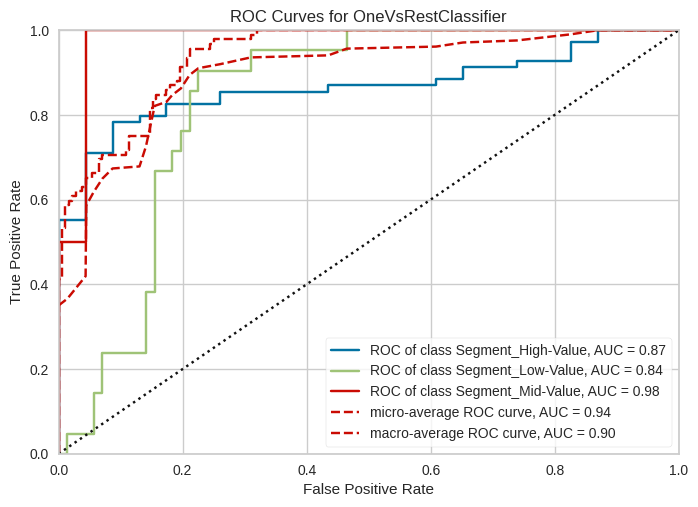

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for OneVsRestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       classes=['Segment_High-Value', 'Segment_Low-Value', 'Segment_Mid-Value'],
       estimator=OneVsRestClassifier(estimator=XGBClassifier(base_score=None,
                                                             booster=None,
                                                             callbacks=None,
                                                             colsample_bylevel=None,
                                                             colsample_bynode=None,
                                                             colsample_bytre...
                                                             gamma=None,
                                                             grow_policy=None,
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=0.1,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=4,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=-1,
                                                             num_parallel_tree=None,
                                                             random_state=None, ...)))

In [104]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(clf, classes=["Segment_High-Value",	"Segment_Low-Value","Segment_Mid-Value"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.poof()
visualizer

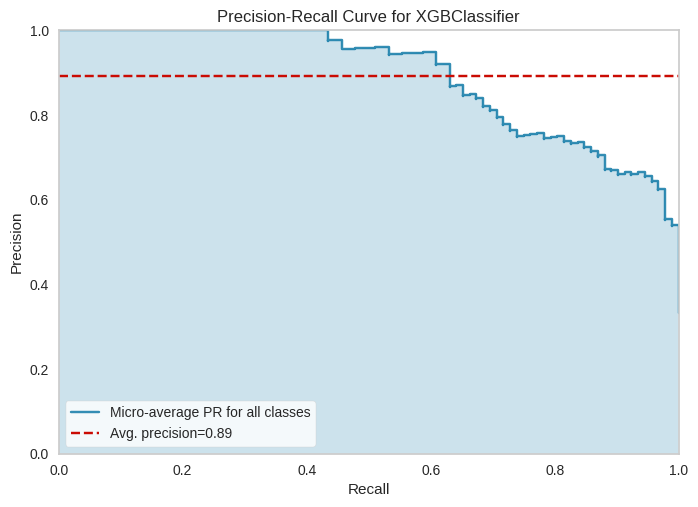

<Axes: title={'center': 'Precision-Recall Curve for XGBClassifier'}, xlabel='Recall', ylabel='Precision'>

In [105]:
from yellowbrick.classifier import PrecisionRecallCurve
# Create the visualizer, fit, score, and poof it
viz = PrecisionRecallCurve(XGBClassifier())
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.poof()

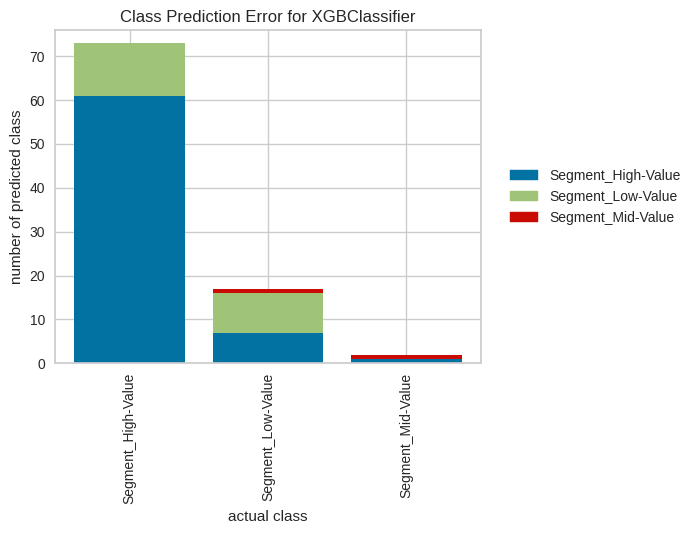

<Axes: title={'center': 'Class Prediction Error for XGBClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [106]:
from yellowbrick.classifier import ClassPredictionError
# Instantiate the classification model and visualizer
visualizer = ClassPredictionError(
    XGBClassifier(random_state=42), classes=["Segment_High-Value",	"Segment_Low-Value","Segment_Mid-Value"]
)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof()

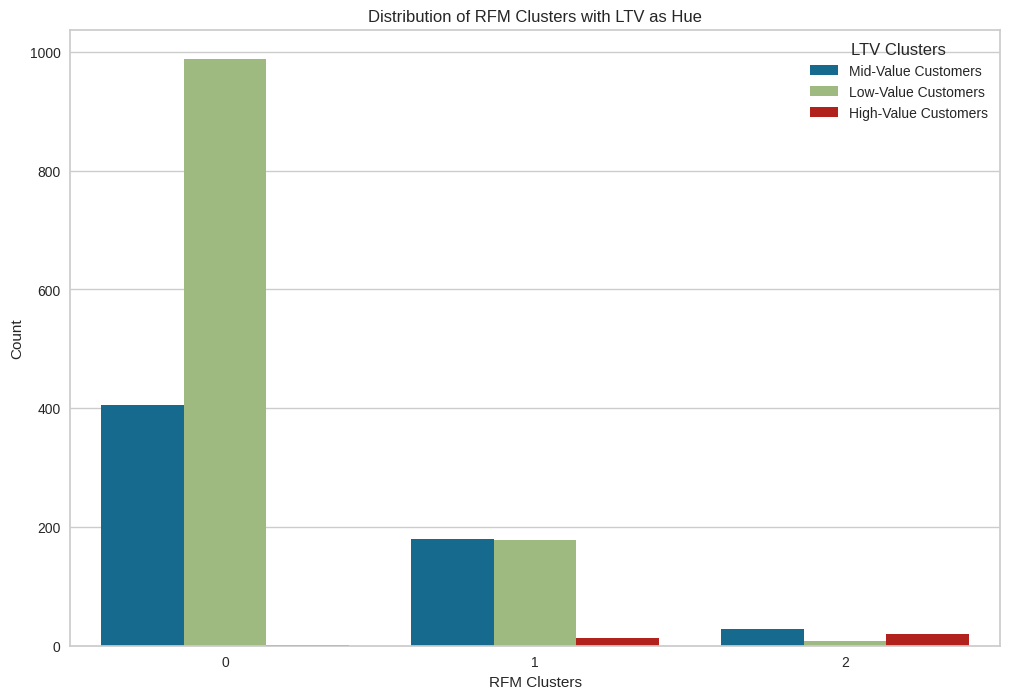

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the barplot with RFM clusters on x-axis and CLV clusters as hue
plt.figure(figsize=(12, 8))
sns.countplot(data=DF_cluster, x='LTVCluster', hue='segment')
plt.title('Distribution of RFM Clusters with LTV as Hue')
plt.xlabel('RFM Clusters')
plt.ylabel('Count')
plt.legend(title='LTV Clusters', loc='upper right')
plt.show()


### Overall Marketing Insight:
- **Strong Performance**: The model performs well in predicting customer segments, particularly for the Mid-Value group.
- **Precision & Targeting**: High precision (0.89) means that marketing campaigns can confidently target the predicted customer segments without much risk of misclassification.
- **Actionable Strategies**:
  - For **High-Value customers**, personalized loyalty programs can be implemented with confidence.
  - The **Mid-Value segment** is well-classified and can be targeted for upselling or engagement strategies.
  - The **Low-Value segment** shows some misclassifications, meaning you might need to revisit the features or consider other variables to better identify these customers for retention campaigns.